These results are for the multinomial model without sentence transformers
Accuracy of each fold is...
[0.51190476 0.58333333 0.6626506  0.74698795 0.63855422 0.63855422
 0.6626506  0.63855422 0.63855422 0.62650602]
average of the folds is...
0.6348250143430867

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                   "ZU"
Predictions            "OU"
Pokemon Name       "Flygon"
Base Stat Total         520
Name: 395, dtype: object
Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Totodile"
Base Stat Total           314
Name: 1193, dtype: object
Tier                    "ZU"
Predictions             "ZU"
Pokemon Name       "Vibrava"
Base Stat Total          340
Name: 1277, dtype: object
Tier                       "ZU"
Predictions                "RU"
Pokemon Name       "Oinkologne"
Base Stat Total             489
Name: 818, dtype: object
Tier           

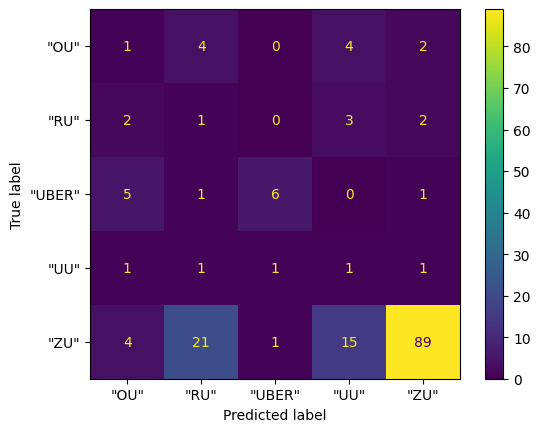

In [141]:
#Predicting Tier based off features
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#features = ["Legendary Type","Primary Type","Secondary Type","Game(s) of Origin","Health Stat","Attack Stat","Defense Stat","Special Attack Stat","Special Defense Stat","Speed Stat","Base Stat Total"]
data = data.dropna(subset="Tier")
irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

#I removed "Pokemon Name" from above so I could check what pokemon where catogorized as what
data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type as a feature for a giggle.
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
features = data.columns.values[2:]
#print(features)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


#Setting up the Multinomial Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
scores = cross_val_score(model,data[features],data["Tier"],scoring='accuracy',cv=kFold)
print("These results are for the multinomial model without sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")




model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()



In [142]:
#This box of code outputs the coefficients of the trained model. It's great fun identifyinig what the model has prioritized as relevant in each tier.
#My competitive friends assure me that Ice is generally considered one of the weaker types, and fairy is univerasally considered the strongest. 
#Note that Fairy having a possitive coefficient is common in the higher tiers, and ice has a positive coefficient in the low tiers.
print("This is the coefficients associated with each tier")
numberOfCoefs = 10
for i, tier in enumerate(model.classes_):
    print(tier)
    sortedCoefs = np.argsort(model.coef_[i])
    print("Negative coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
    print("Positive coefficients")
    for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
        print(features[coefficientIndex])
        print(model.coef_[i, coefficientIndex])
        


This is the coefficients associated with each tier
"OU"
Negative coefficients
Secondary Type_"Normal"
-1.3709288791281535
Primary Type_"Ice"
-1.2800732470347669
Primary Type_"Normal"
-1.189859090269494
Secondary Type_"Grass"
-1.1602022823110227
Secondary Type_"Rock"
-1.075014773772838
Primary Type_"Ghost"
-1.0141738456413636
Secondary Type_"Fighting"
-0.7747766933976474
Primary Type_"Electric"
-0.5536053283292157
Primary Type_"Steel"
-0.5439378998771982
Primary Type_"Flying"
-0.5238284009025475
Positive coefficients
Secondary Type_"Dragon"
0.5670805053756593
Primary Type_"Bug"
0.5983850967238588
Secondary Type_"Ice"
0.6114886857170247
Primary Type_"Dragon"
0.9295863377535706
Secondary Type_"Electric"
0.9471152177618531
Primary Type_"Rock"
0.9614324328832299
Primary Type_"Ground"
1.0069668938663505
Secondary Type_"Fairy"
1.086943366375254
Primary Type_"Fire"
1.215514250989637
Secondary Type_"Ground"
1.2379159936254476
"RU"
Negative coefficients
Primary Type_"Ground"
-1.9991880957280164


These results are for the multinomial model WITH sentence transformers
Accuracy of each fold is...
[0.72619048 0.71428571 0.63855422 0.62650602 0.72289157 0.65060241
 0.59036145 0.59036145 0.6746988  0.65060241]
average of the folds is...
0.6585054503729203

Below is the predictions of an example fold, and it's associated confusion Matrix!
Have fun looking through and seeing what the model predicted!
Tier                         "OU"
Predictions                  "UU"
Pokemon Name       "Iron Valiant"
Base Stat Total               590
Name: 568, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Piplup"
Base Stat Total         314
Name: 880, dtype: object
Tier                     "ZU"
Predictions              "ZU"
Pokemon Name       "Stantler"
Base Stat Total           465
Name: 1112, dtype: object
Tier                   "ZU"
Predictions            "ZU"
Pokemon Name       "Tynamo"
Base Stat Total         275
Name: 1213, dtype: object
Tier          

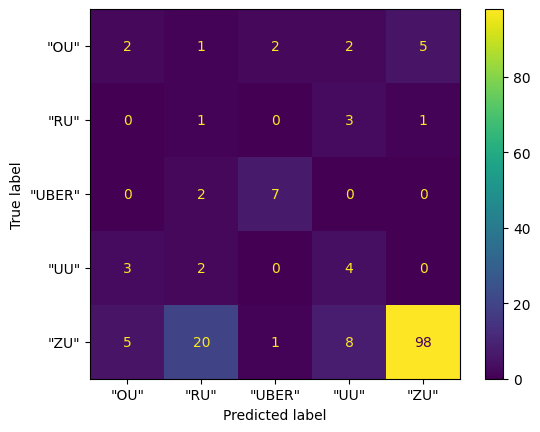

In [143]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")
#Change this to your path to the CSV
dataAgain = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
dataAgain = dataAgain.dropna(subset="Tier")

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

dataAgain = dataAgain.drop(labels=irrelevantFeatures,axis=1)
dataAgain = pd.get_dummies(dataAgain,columns=["Primary Type","Secondary Type"])
features = dataAgain.columns.values[5:]
#abilityFeatures = dataAgain.columns.values[2:5]
#print(features)
#print(abilityFeatures)

#x = np.array(data[features])
#y = np.array(data["Tier"])
#print(x)
#print(y)


dataAgain = dataAgain.fillna(value="")

allFeatures = dataAgain[features]
PrimaryEmbedings = sentencesToVectors.encode(list(dataAgain["Primary Ability Description"]))
SecondaryEmbedings = sentencesToVectors.encode(list(dataAgain["Secondary Ability Description"]))
HiddenEmbedings = sentencesToVectors.encode(list(dataAgain["Hidden Ability Description"]))

allFeatures = np.hstack([allFeatures, PrimaryEmbedings, SecondaryEmbedings, HiddenEmbedings])
allLabels = np.array(dataAgain["Tier"])

# This code can be used to do a single train_test_split.
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(dataAgain,test_size=0.2)

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Tier"])
testY = np.array(testData["Tier"])


from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',solver ='newton-cg',class_weight="balanced")
#Setting up Kfold
kFold = StratifiedKFold(n_splits=10,shuffle=True)
#Damn the folds take forever because theres so many features lmaoooo
scores = cross_val_score(model,allFeatures,allLabels,scoring='accuracy',cv=kFold)
print("These results are for the multinomial model WITH sentence transformers")
print("Accuracy of each fold is...")
print(scores)
print("average of the folds is...")
print(scores.mean())
print()
print("Below is the predictions of an example fold, and it's associated confusion Matrix!")
print("Have fun looking through and seeing what the model predicted!")

model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
for i, row in testData.iterrows():
    print(row[["Tier","Predictions","Pokemon Name","Base Stat Total"]])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
conf_matr = confusion_matrix(testData["Tier"],testData["Predictions"])
disp = ConfusionMatrixDisplay(conf_matr,display_labels=model.classes_)
accuracyNumber = accuracy_score(testY,predictions)
print()
print("Accuracy =")
print(accuracyNumber)
disp.plot()
plt.show()

In [144]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Tier", "Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      "Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                        "Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
trainX = np.array(trainData[features])
testX = np.array(testData[features])
trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])


Root Mean squared error =
2.450568384194354
Pokemon Name    "Slakoth"
Gen                     3
Predictions      3.767758
Name: 1062, dtype: object
Pokemon Name    "Mareanie"
Gen                      7
Predictions         4.9395
Name: 698, dtype: object
Pokemon Name    "Toxtricity"
Gen                        8
Predictions         4.255903
Name: 1201, dtype: object
Pokemon Name    "Zoroark"
Gen                     8
Predictions      6.661664
Name: 1374, dtype: object
Pokemon Name    "Lopunny"
Gen                     6
Predictions      6.317299
Name: 651, dtype: object
Pokemon Name    "Heracross"
Gen                       2
Predictions        6.805998
Name: 525, dtype: object
Pokemon Name    "Terapagos"
Gen                       8
Predictions        5.419035
Name: 1166, dtype: object
Pokemon Name    "Skarmory"
Gen                      2
Predictions       5.402933
Name: 1052, dtype: object
Pokemon Name    "Munchlax"
Gen                      4
Predictions       4.611589
Name: 778, dtype: o

In [145]:
numberOfCoefs = 3
sortedCoefs = np.argsort(model.coef_)
for k, coefficientIndex in enumerate(sortedCoefs[:numberOfCoefs]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])
for k, coefficientIndex in enumerate(sortedCoefs[-numberOfCoefs:]):
    print(features[coefficientIndex])
    print(model.coef_[coefficientIndex])

Primary Type_"Ground"
-1.167570957372002
Primary Type_"Water"
-0.9386169296707818
Primary Type_"Psychic"
-0.8485705447709327
Secondary Type_"Bug"
1.9860798968656919
Secondary Type_"Ghost"
2.3746702836277085
Secondary Type_"Normal"
3.5552850474387343


In [146]:
from sentence_transformers import SentenceTransformer

sentencesToVectors = SentenceTransformer("all-MiniLM-L6-v2")

import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
#Change this to your path to the CSV
data = pd.read_csv("C:/Users/Owner/Downloads/Pokemon Regression Final Project/Pokemon Database W Tiers.csv")
#data = data.dropna(subset="Tier")
uniqueGames = data["Game(s) of Origin"].unique()
#print(uniqueGames)
gameToGen = {'"Diamond"':4,'"X"':6,'"Red"':1,'"Ruby"':3,'"Black"':5,'"Gold"':2,
    '"Sword"':8,'"Omega Ruby"':6,'"Scarlet"':9,'"Sun"':7,'"Legends Arceus"':8,
    '"Ultra Sun"':7,'"Fire Red"':3,'"Leaf Green"':3,'"Emerald"':3,'"Let\'s Go Pikachu"':7,'"Pokémon GO"':7,
    '"Platinum"':4,'"Violet"':8,'"Black 2"':5}
data["Gen"] = data["Game(s) of Origin"].apply(lambda x:gameToGen[x])

#data.loc[~data.index.isin(data.dropna(subset="Evolution Details").index)]

irrelevantFeatures = ["Pokemon Id", "Pokedex Number", "Classification","Alternate Form Name", "Original Pokemon ID", "Pokemon Height",
                      #"Pokemon Weight", "Primary Ability", "Primary Ability Description","Secondary Ability", "Secondary Ability Description",
                      "Pokemon Weight", "Primary Ability", "Secondary Ability", 
                        #"Hidden Ability","Hidden Ability Description", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                        "Hidden Ability", "Special Event Ability","Special Event Ability Description", "Male Ratio",
                          "Female Ratio","Base Happiness","Game(s) of Origin","Health EV", "Attack EV", "Defense EV","Special Attack EV",
                            "Special Defense EV", "Speed EV", "EV Yield Total","Catch Rate", "Experience Growth", "Experience Growth Total",
                            #Removed legendary type for a giggle
                            "Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details","Legendary Type"]
                            #"Primary Egg Group", "Secondary Egg Group", "Egg Cycle Count","Pre-Evolution Pokemon Id", "Evolution Details"]

data = data.drop(labels=irrelevantFeatures,axis=1)
data = data.fillna(value="") #Dont forget this or the sentence transformer will see a NaN and explode
#Below I removed legendary type 
#data = pd.get_dummies(data,columns=["Legendary Type","Primary Type","Secondary Type"])
data = pd.get_dummies(data,columns=["Primary Type","Secondary Type"])
#features = data.columns.values[2:]
features = [
    'Health Stat', 'Attack Stat', 'Defense Stat',
    'Special Attack Stat', 'Special Defense Stat', 'Speed Stat',
    'Base Stat Total', 'Primary Type_"Bug"', 'Primary Type_"Dark"',
    'Primary Type_"Dragon"', 'Primary Type_"Electric"', 'Primary Type_"Fairy"',
    'Primary Type_"Fighting"', 'Primary Type_"Fire"', 'Primary Type_"Flying"',
    'Primary Type_"Ghost"', 'Primary Type_"Grass"', 'Primary Type_"Ground"',
    'Primary Type_"Ice"', 'Primary Type_"Normal"', 'Primary Type_"Poison"',
    'Primary Type_"Psychic"', 'Primary Type_"Rock"', 'Primary Type_"Steel"',
    'Primary Type_"Water"', 'Secondary Type_"Bug"', 'Secondary Type_"Dark"',
    'Secondary Type_"Dragon"', 'Secondary Type_"Electric"',
    'Secondary Type_"Fairy"', 'Secondary Type_"Fighting"',
    'Secondary Type_"Fire"', 'Secondary Type_"Flying"',
    'Secondary Type_"Ghost"', 'Secondary Type_"Grass"',
    'Secondary Type_"Ground"', 'Secondary Type_"Ice"',
    'Secondary Type_"Normal"', 'Secondary Type_"Poison"',
    'Secondary Type_"Psychic"', 'Secondary Type_"Rock"',
    'Secondary Type_"Steel"', 'Secondary Type_"Water"'
]
#print(features)

from sklearn.model_selection import train_test_split
#trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2)


trainData, testData = train_test_split(data,test_size=0.2)
#Attempting to add Sentence transformers

trainX = np.array(trainData[features])
trainPrimaryEmbedings = sentencesToVectors.encode(list(trainData["Primary Ability Description"]))
trainSecondaryEmbedings = sentencesToVectors.encode(list(trainData["Secondary Ability Description"]))
trainHiddenEmbedings = sentencesToVectors.encode(list(trainData["Hidden Ability Description"]))
trainX = np.hstack([trainX, trainPrimaryEmbedings, trainSecondaryEmbedings, trainHiddenEmbedings])

testX = np.array(testData[features])
testPrimaryEmbedings = sentencesToVectors.encode(list(testData["Primary Ability Description"]))
testSecondaryEmbedings = sentencesToVectors.encode(list(testData["Secondary Ability Description"]))
testHiddenEmbedings = sentencesToVectors.encode(list(testData["Hidden Ability Description"]))
testX = np.hstack([testX, testPrimaryEmbedings, testSecondaryEmbedings, testHiddenEmbedings])

trainY = np.array(trainData["Gen"])
testY = np.array(testData["Gen"])


#Without sentance transformer code
# trainX = np.array(trainData[features])
# testX = np.array(testData[features])
# trainY = np.array(trainData["Gen"])
# testY = np.array(testData["Gen"])

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=0.1)


model.fit(trainX, trainY)
predictions = model.predict(testX)
#print(predictions)
testData["Predictions"] = predictions
#print(testData[["Tier","Predictions","Pokemon Name"]])
print("Root Mean squared error =")
print(np.sqrt(mean_squared_error(testY, predictions)))
for i, row in testData.iterrows():
    print(row[["Pokemon Name","Gen","Predictions"]])

Root Mean squared error =
1.916552340519452
Pokemon Name    "Decidueye"
Gen                       8
Predictions         7.27621
Name: 250, dtype: object
Pokemon Name     "Unown"
Gen                    2
Predictions     2.759981
Name: 1236, dtype: object
Pokemon Name    "Alcremie"
Gen                      8
Predictions       7.625914
Name: 23, dtype: object
Pokemon Name    "Cranidos"
Gen                      4
Predictions       4.720778
Name: 223, dtype: object
Pokemon Name    "Oricorio"
Gen                      7
Predictions       7.963471
Name: 827, dtype: object
Pokemon Name    "Whirlipede"
Gen                        5
Predictions         5.305216
Name: 1326, dtype: object
Pokemon Name    "Haunter"
Gen                     1
Predictions      3.024842
Name: 518, dtype: object
Pokemon Name     "Unown"
Gen                    2
Predictions     2.759981
Name: 1244, dtype: object
Pokemon Name    "Overqwil"
Gen                      8
Predictions        7.24838
Name: 833, dtype: object
Pokemo